In [126]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
import warnings
warnings.filterwarnings("ignore")

In [127]:
df=pd.read_csv('cubic_zirconia.csv')

In [128]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [129]:
df=df.drop('Unnamed: 0',axis=1)

In [130]:
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [133]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [134]:
df.isna().any()

carat      False
cut        False
color      False
clarity    False
depth       True
table      False
x          False
y          False
z          False
price      False
dtype: bool

In [135]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 34


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [136]:
df.drop_duplicates(inplace=True)

In [137]:
df.shape

(26933, 10)

In [138]:
df.dtypes.value_counts()

float64    6
object     3
int64      1
dtype: int64

In [139]:
print(df['clarity'].value_counts())
print(df['cut'].value_counts())
print(df['color'].value_counts())

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64


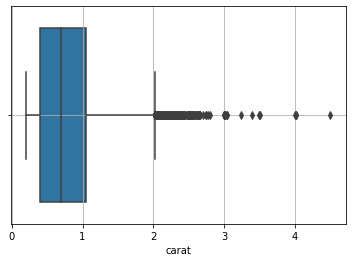

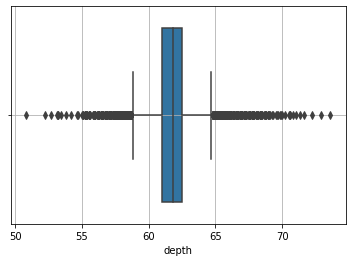

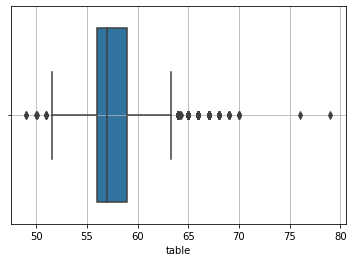

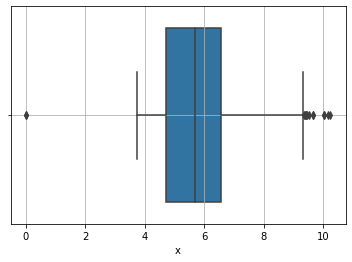

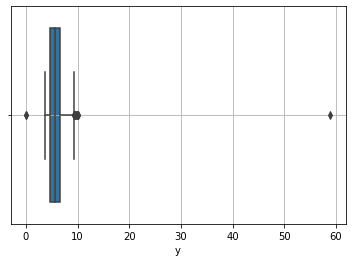

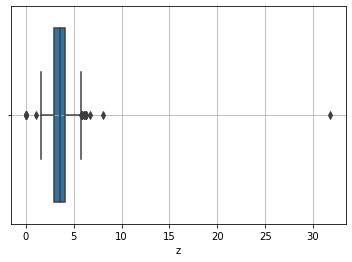

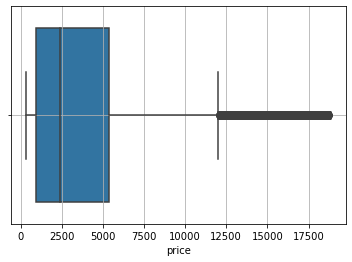

In [140]:
cols = ['carat',  'depth', 'table', 'x', 'y', 'z',
       'price']
for i in cols:
    sns.boxplot(df[i],whis=1.5)
    plt.grid()
    plt.show();

<AxesSubplot:xlabel='cut', ylabel='count'>

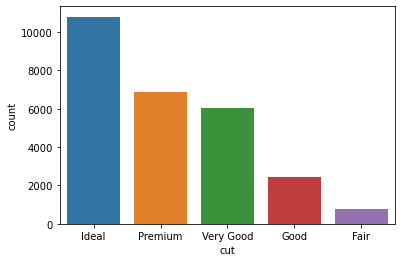

In [141]:
sns.countplot(x=df['cut'])

<AxesSubplot:xlabel='color', ylabel='count'>

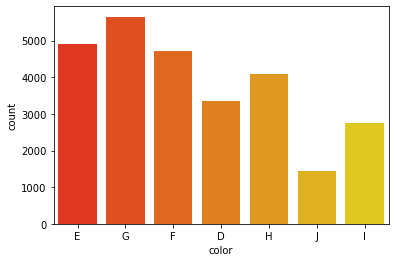

In [142]:
sns.countplot(x=df['color'],palette='autumn')

<AxesSubplot:xlabel='clarity', ylabel='count'>

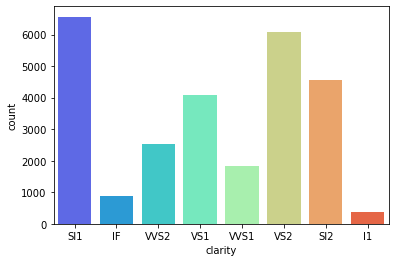

In [143]:
sns.countplot(x=df['clarity'],palette='rainbow')

<AxesSubplot:xlabel='cut', ylabel='price'>

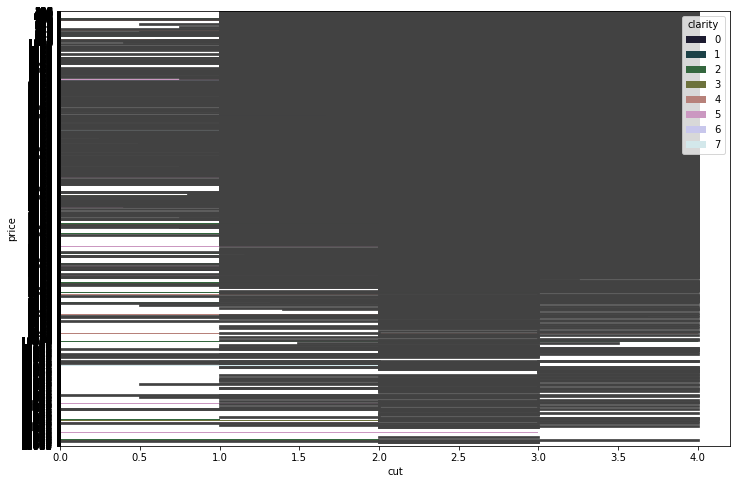

In [184]:
plt.figure(figsize=(12,8))
sns.barplot(x='cut',y='price',hue='clarity',data=df,palette='cubehelix',orient='h')

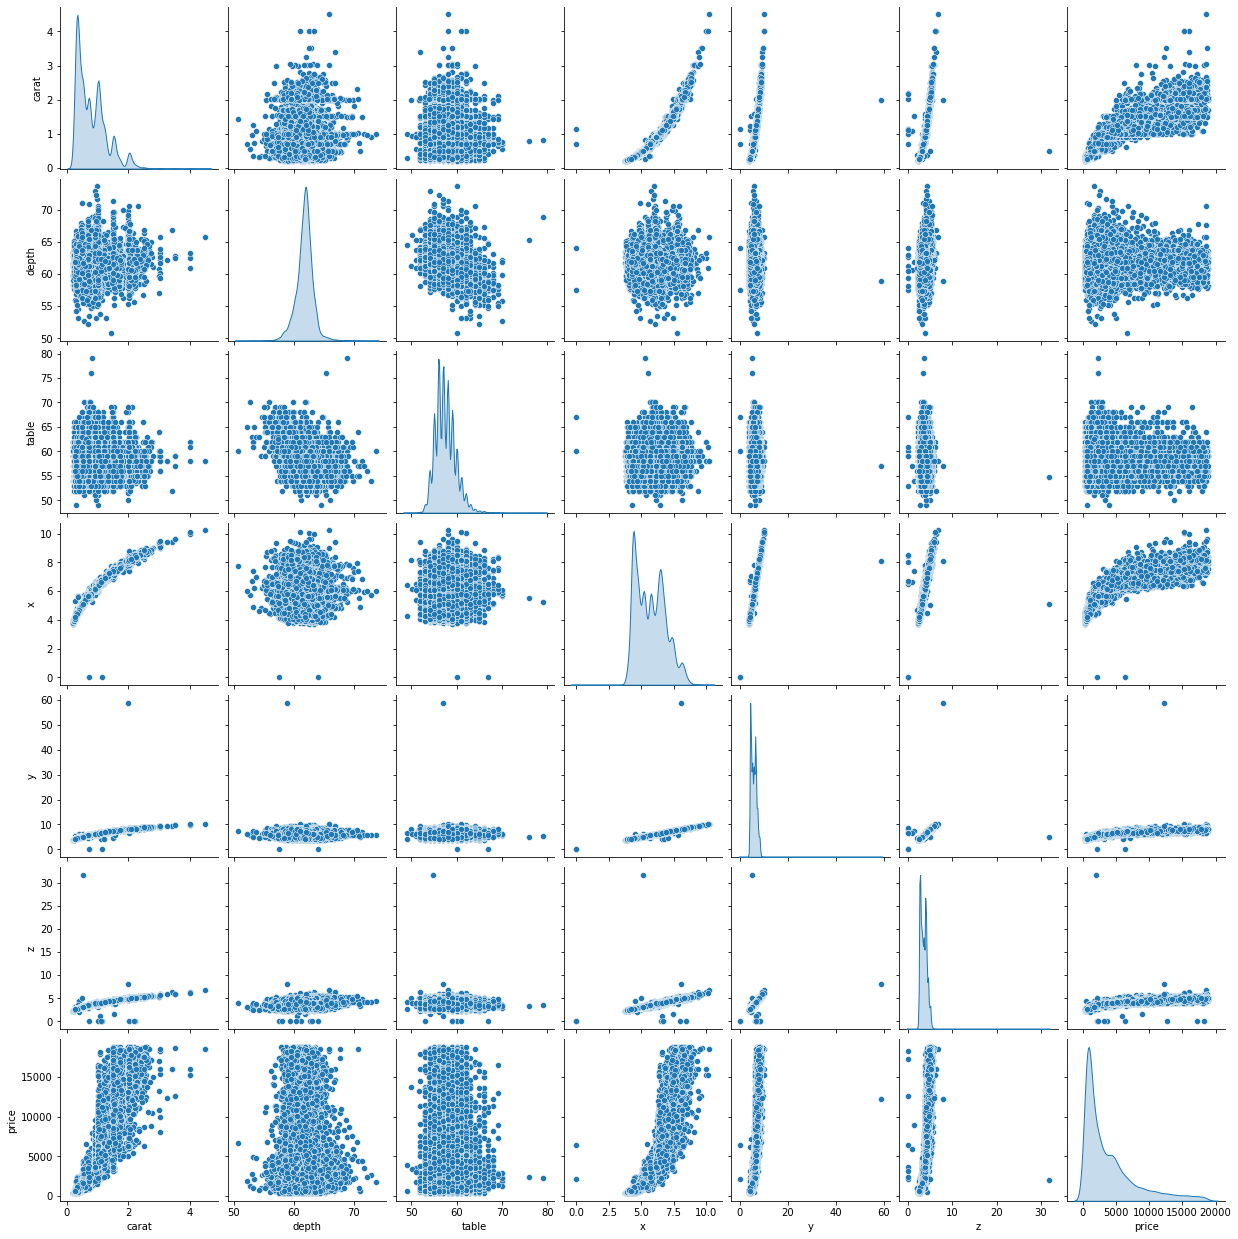

In [145]:
sns.pairplot(data=df,diag_kind='kde')

In [146]:
sns.palettes

<module 'seaborn.palettes' from 'C:\\Users\\shpar\\Anaconda3\\lib\\site-packages\\seaborn\\palettes.py'>

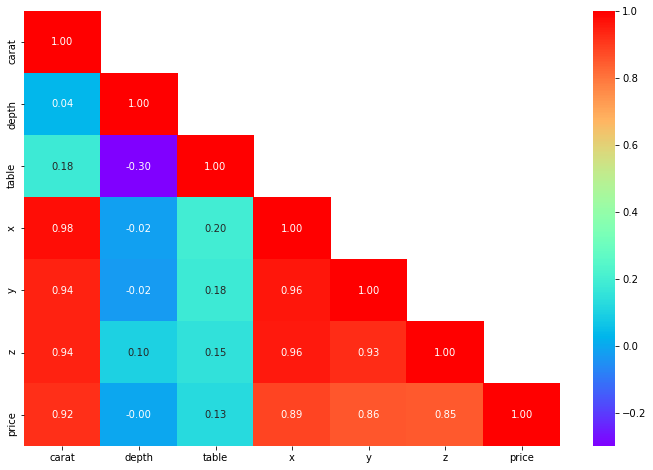

In [147]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df.corr(),+1))
plt.show()

In [148]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [149]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


In [150]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [151]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()    

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [152]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [153]:
from sklearn.preprocessing import LabelEncoder

## Defining a Label Encoder object instance
LE = LabelEncoder()
df['cut'] = LE.fit_transform(df['cut'])
df['clarity'] = LE.fit_transform(df['clarity'])
df['color'] = LE.fit_transform(df['color'])
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
X = df.drop('price', axis=1)


# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [158]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [159]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 11334.872515463108
The coefficient for cut is 61.136070556541895
The coefficient for color is -282.3279233030346
The coefficient for clarity is 290.8043919482828
The coefficient for depth is -153.61551036282583
The coefficient for table is -93.015861591927
The coefficient for x is -1257.7214789545712
The coefficient for y is 4.4171396943337955
The coefficient for z is -30.796282163082417


In [160]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 16477.59659367804


In [161]:
regression_model.score(X_train, y_train)

0.8866464008392584

In [162]:
regression_model.score(X_test, y_test)

0.8891401657149539

In [163]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
22114,0.34,4,4,5,62.4,60.0,4.41,4.44,2.76,537
2275,0.30,2,1,5,61.2,55.0,4.35,4.31,2.65,844
19183,0.50,2,3,2,62.5,57.0,5.09,5.05,3.17,1240
5030,1.10,1,1,3,63.3,56.0,6.53,6.58,4.15,4065
25414,1.02,3,2,3,61.1,62.0,6.54,6.49,3.98,4057


In [164]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+depth+depth+x+y+z', data = data_train).fit()
lm1.params

Intercept    12271.877325
carat        11519.819334
cut             48.597597
color         -268.941066
depth         -136.271007
x            -1511.930047
y               26.558200
z               -6.138346
dtype: float64

In [165]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                 1.783e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:43:44   Log-Likelihood:            -1.6401e+05
No. Observations:               18853   AIC:                         3.280e+05
Df Residuals:                   18845   BIC:                         3.281e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.227e+04    596.760     20.564      0.0

In [166]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(X_test)-y_test)**2)

In [167]:
import math

math.sqrt(mse)

1349.3653679201268

In [168]:
regression_model.score(X_test, y_test)

0.8891401657149539

In [169]:
y_pred = regression_model.predict(X_test)

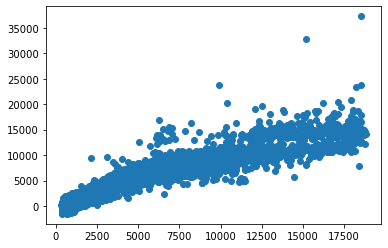

In [170]:
plt.scatter(y_test['price'], y_pred)
